In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm, percentileofscore
from scipy.stats import shapiro

In [ ]:
# importación datos desde archivo .csv
df = pd.read_csv('/content/baby.csv')
df

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


1. Exploración de datos.

In [ ]:
df.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [ ]:
# Análisis descriptivo de las variables numéricas y categóricas
descriptive_stats = df.describe()

# Contar los valores únicos y proporciones para la variable categórica (Maternal.Smoker)
smoker_distribution = df['Maternal.Smoker'].value_counts(normalize=True)

descriptive_stats, smoker_distribution

(        Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age  \
 count  1174.000000   1174.000000       1174.000000   1174.000000   
 mean    587.500000    119.462521        279.101363     27.228279   
 std     339.048915     18.328671         16.010305      5.817839   
 min       1.000000     55.000000        148.000000     15.000000   
 25%     294.250000    108.000000        272.000000     23.000000   
 50%     587.500000    120.000000        280.000000     26.000000   
 75%     880.750000    131.000000        288.000000     31.000000   
 max    1174.000000    176.000000        353.000000     45.000000   
 
        Maternal.Height  Maternal.Pregnancy.Weight  
 count      1174.000000                1174.000000  
 mean         64.049404                 128.478705  
 std           2.526102                  20.734282  
 min          53.000000                  87.000000  
 25%          62.000000                 114.250000  
 50%          64.000000                 125.000000  
 75%  

2. Estudio de la distribución normal

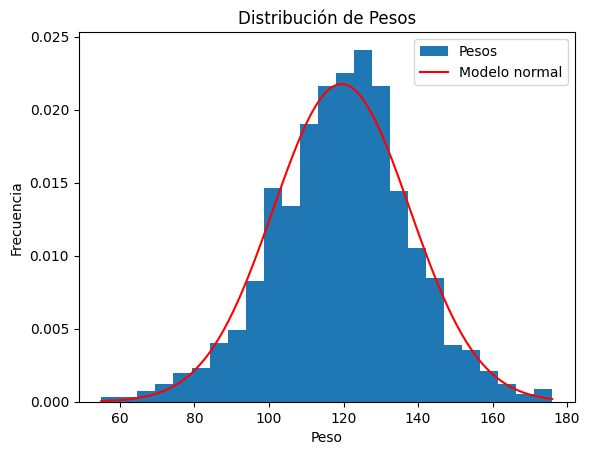

In [ ]:
pesos = df['Birth.Weight']


mu=pesos.mean()
sigma=pesos.std()
minimo=pesos.min()
maximo=pesos.max()
x = np.linspace(minimo, maximo,100)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.hist(pesos, bins=25, density=True, alpha=1, label='Pesos')
plt.plot(x, pdf, color='red', label='Modelo normal')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pesos')
plt.legend()
plt.show()

El histograma muestra que los pesos de los bebes tienen una distribución que se asemeja a la normal, pero existen algunas desviaciones especialmente en los extremos, para verificar lo anterior realizamos la prueba de normalidad

In [ ]:
# Prueba de normalidad con Shapiro-Wilk
shapiro_test = shapiro(df['Birth.Weight'])

shapiro_test

ShapiroResult(statistic=0.9956294764609604, pvalue=0.0019165908765839351)

según resultados obtenidos de la prueba Shapiro-Wilk para verificar sdi los datos siguen una distribución normal con un p-valor menor a 0.05, se rechaza la hipótesis nula de que los datos provienen de una distribución normal, esto indica que los pesos no son perfectamente normales.

3. Verificar distribución normal de los pesos para 5 valores diferentes

   Sample Values  Theoretical Probabilities  Real Probabilities
0          55.00                   0.000045            0.000189
1          85.25                   0.003812            0.003601
2         115.50                   0.021263            0.021958
3         145.75                   0.007782            0.007331
4         176.00                   0.000187            0.000423


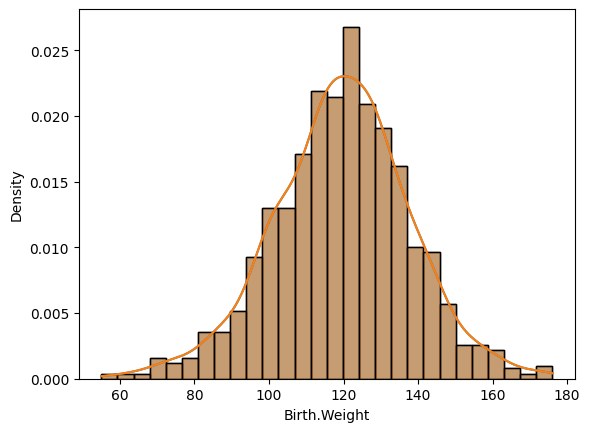

In [ ]:
#probabilidades teóricas de una distribución normal
sample_values = np.linspace(df['Birth.Weight'].min(), df['Birth.Weight'].max(), 5)
# Estimar las probabilidades reales a partir de la distribución observada
sns.histplot(df['Birth.Weight'], kde=True, bins=30, stat="density")
plt.close()  # Cerramos la figura previa para capturar las líneas
# Obtenemos los valores reales del KDE generado
real_probabilities = sns.histplot(df['Birth.Weight'], kde=True, stat="density").get_lines()[0].get_ydata()
real_x_values = sns.histplot(df['Birth.Weight'], kde=True, stat="density").get_lines()[0].get_xdata()

# Interpolar probabilidades reales para los valores seleccionados
real_probabilities_at_samples = np.interp(sample_values, real_x_values, real_probabilities)

# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    'Sample Values': sample_values,
    'Theoretical Probabilities': theoretical_probabilities,
    'Real Probabilities': real_probabilities_at_samples
})

# Mostrar el DataFrame
print(comparison_df)


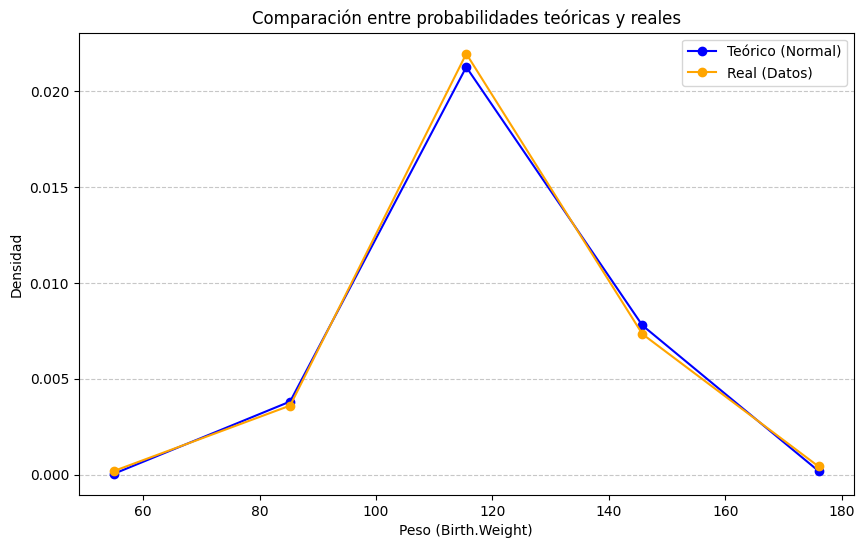

In [ ]:
# Visualizar la comparación
plt.figure(figsize=(10, 6))
plt.plot(sample_values, theoretical_probabilities, label="Teórico (Normal)", marker='o', color='blue')
plt.plot(sample_values, real_probabilities_at_samples, label="Real (Datos)", marker='o', color='orange')
plt.title("Comparación entre probabilidades teóricas y reales")
plt.xlabel("Peso (Birth.Weight)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Compara pesos de bebes de madres fumadoras y no fumadoras

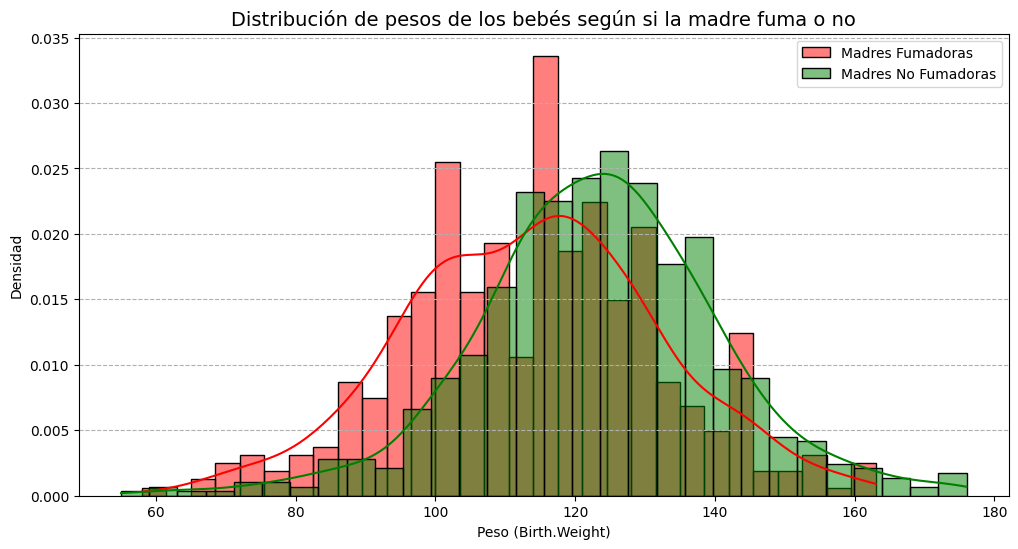

In [ ]:
from scipy.stats import ttest_ind
# primero dividimos los datos entre las madres fumadoras y no fumadoras

smoker_data = df[df['Maternal.Smoker'] == True]
non_smoker_data = df[df['Maternal.Smoker'] == False]

# Estadísticas descriptivas de los pesos
smoker_stats = smoker_data['Birth.Weight'].describe()
non_smoker_stats = non_smoker_data['Birth.Weight'].describe()

# Prueba t para comparar las medias
t_stat, p_value = ttest_ind(smoker_data['Birth.Weight'], non_smoker_data['Birth.Weight'], equal_var=False)

# Visualización de la comparación
plt.figure(figsize=(12, 6))
sns.histplot(smoker_data['Birth.Weight'], kde=True, color='red', label='Madres Fumadoras', bins=30, stat="density")
sns.histplot(non_smoker_data['Birth.Weight'], kde=True, color='green', label='Madres No Fumadoras', bins=30, stat="density")
plt.title("Distribución de pesos de los bebés según si la madre fuma o no", fontsize=14)
plt.xlabel("Peso (Birth.Weight)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

In [ ]:
# Resultados
print("Estadísticas de bebés de madres fumadoras:")
print(smoker_stats)
print("\nEstadísticas de bebés de madres no fumadoras:")
print(non_smoker_stats)
print(f"\nPrueba t: Estadístico = {t_stat:.3f}, p-valor = {p_value:.3f}")

if p_value < 0.05:
    print("\nConclusión: Hay una diferencia estadísticamente significativa en los pesos de los bebés entre madres fumadoras y no fumadoras.")
else:
    print("\nConclusión: No hay evidencia suficiente para afirmar que existe una diferencia significativa en los pesos de los bebés.")

Estadísticas de bebés de madres fumadoras:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

Estadísticas de bebés de madres no fumadoras:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64

Prueba t: Estadístico = -8.626, p-valor = 0.000

Conclusión: Hay una diferencia estadísticamente significativa en los pesos de los bebés entre madres fumadoras y no fumadoras.


5. Probabilidades

In [ ]:
# Calcular la probabilidad de que una madre escogida al azar fume
p_fuma = df['Maternal.Smoker'].mean()
print(f"Probabilidad de que una madre escogida al azar fume: {p_fuma:.4f}")

Probabilidad de que una madre escogida al azar fume: 0.3910



Probabilidades binomiales para 5 madres al azar:
0 madres fumadoras: 0.0838
1 madres fumadoras: 0.2689
2 madres fumadoras: 0.3453
3 madres fumadoras: 0.2217
4 madres fumadoras: 0.0712
5 madres fumadoras: 0.0091


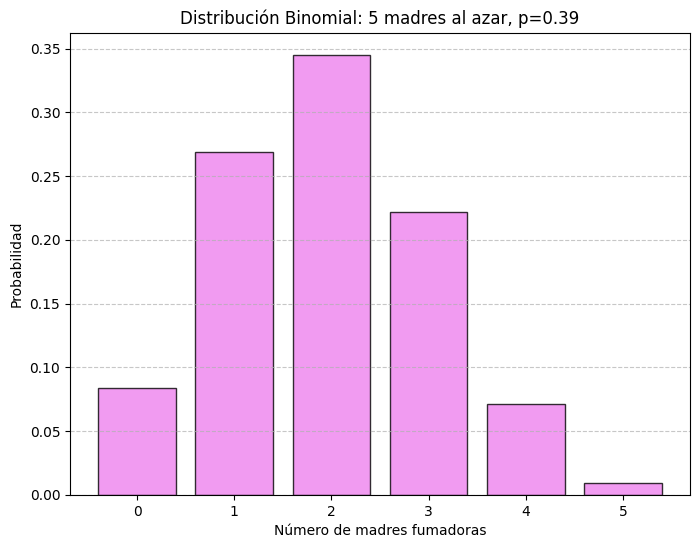

In [ ]:

# Modelo de distribución binomial para 5 madres escogidas al azar
n_madres = 5
x = np.arange(0, n_madres + 1)
binomial_probs = binom.pmf(x, n=n_madres, p=p_fuma)

print(f"\nProbabilidades binomiales para {n_madres} madres al azar:")
for i, prob in enumerate(binomial_probs):
    print(f"{i} madres fumadoras: {prob:.4f}")

# Graficar la distribución binomial
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_probs, color='violet', alpha=0.8, edgecolor='black')
plt.title(f"Distribución Binomial: {n_madres} madres al azar, p={p_fuma:.2f}")
plt.xlabel("Número de madres fumadoras")
plt.ylabel("Probabilidad")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

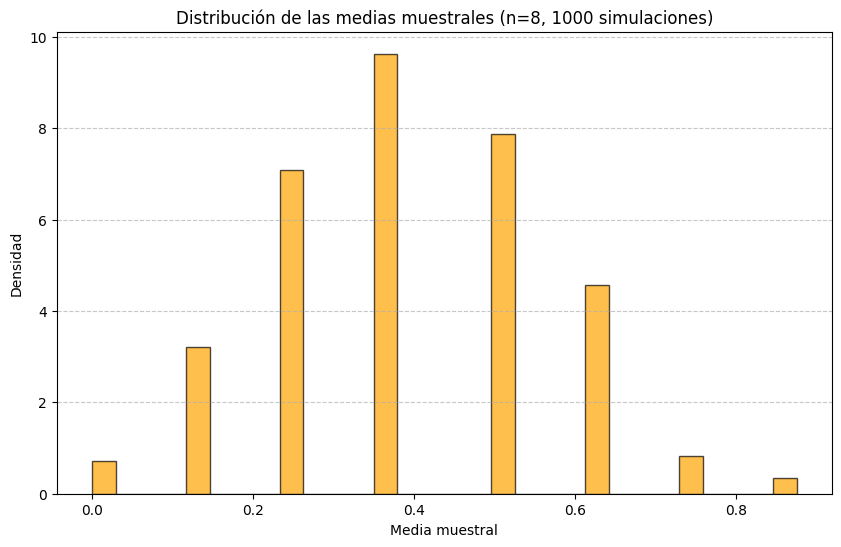

In [ ]:
# Simular 1000 muestras de tamaño 8 y calcular sus medias muestrales
n_muestras = 1000
tamano_muestra = 8
simulaciones = binom.rvs(n=tamano_muestra, p=p_fuma, size=n_muestras)
medias_muestrales = simulaciones / tamano_muestra

# Graficar las medias muestrales
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, color='orange', alpha=0.7, edgecolor='black', density=True)
plt.title(f"Distribución de las medias muestrales (n={tamano_muestra}, {n_muestras} simulaciones)")
plt.xlabel("Media muestral")
plt.ylabel("Densidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Mostrar estadísticas de las medias muestrales
print(f"\nMedia de las medias muestrales simuladas: {np.mean(medias_muestrales):.4f}")
print(f"Desviación estándar de las medias muestrales simuladas: {np.std(medias_muestrales):.4f}")



Media de las medias muestrales simuladas: 0.3937
Desviación estándar de las medias muestrales simuladas: 0.1717
